<a href="https://colab.research.google.com/github/BantikovBA/a/blob/main/Lab%2003.06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-bc63a4a52605>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  H_point.set_data(XH[i], YH[i])
<ipython-input-4-bc63a4a52605>:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  D_point.set_data(XD[i], YD[i])


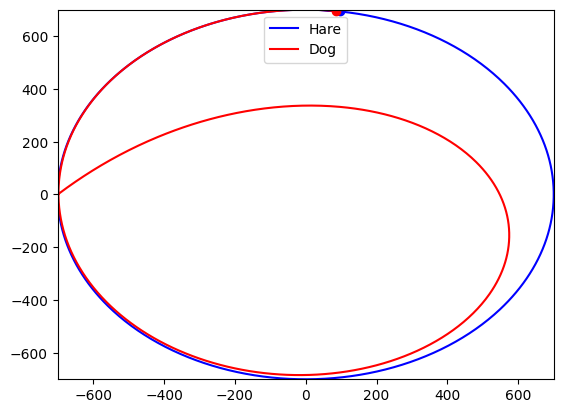

In [4]:
# импорт пакетов
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

#Начальные условия задачи
R=700
VH=5
VD=5.35
DeltaT=1
DeltaA=(VH*DeltaT)/R
n=900  #Кол-во кадров

#Начальные положения точек
XH=np.zeros(n)
YH=np.zeros(n)
XD=np.zeros(n)
YD=np.zeros(n)
f=np.zeros(n)
XD[0]=-R
YD[0]=0

#цикл движения нашей животины
for i in range(n):
    XH[i]=R*np.sin(DeltaA*i)
    YH[i]=R*np.cos(DeltaA*i)
    f[i]=np.arctan2((YH[i]-YD[i]),(XH[i]-XD[i])) #2 после arctg т.к. он от двух переменных

#Задаём пустой график, ограниченный
fig, ax=plt.subplots()
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)

#Параметры линий графика
H_line, = ax.plot([], [], 'b-', label='Hare') #Используется в скобках а-ля augment, чтобы добавить информацию
D_line, = ax.plot([], [], 'r-', label='Dog')
H_point, = ax.plot([], [], 'bo')
D_point, = ax.plot([], [], 'ro')

#инициализирует начальные атрибуты
def init():
    H_line.set_data([], [])
    D_line.set_data([], [])
    H_point.set_data([], [])
    D_point.set_data([], [])
    return H_line, D_line, H_point, D_point

# Вызывает функцию анимации
def animate(i):
    H_line.set_data(XH[:i+1], YH[:i+1])
    D_line.set_data(XD[:i+1], YD[:i+1])
    H_point.set_data(XH[i], YH[i])
    D_point.set_data(XD[i], YD[i])
    return H_line, D_line, H_point, D_point

def update(frame):
    global XD, YD, f
    if frame < n-1:
        XD[frame+1] = XD[frame] + VD * DeltaT * np.cos(f[frame])
        YD[frame+1] = YD[frame] + VD * DeltaT * np.sin(f[frame])
        f[frame+1] = np.arctan2((YH[frame] - YD[frame]), (XH[frame] - XD[frame]))

    return animate(frame)

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=n, interval=100, blit=True, init_func=init)
ani.save('WolfHare.mp4',fps=30, extra_args=['-vcodec','libx264'])
plt.show()